In [19]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for (i, sequence) in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_val = x_train[10000:]
y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_16 = model.fit(partial_x_val,
                       partial_y_val,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val, y_val),
                       verbose=0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [7]:
history_dict_16=history_16.history
history_dict_16.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [20]:
model = models.Sequential()
model.add(
    layers.Dense(16,
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(10000, )))
model.add(
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_L2 = model.fit(partial_x_val,
                      partial_y_val,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val),
                      verbose=0)

In [21]:
history_dict_L2 = history_L2.history

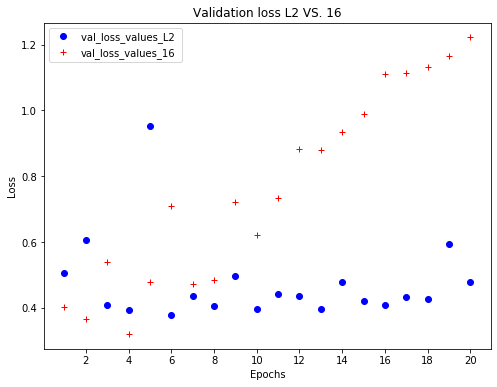

In [23]:
val_loss_values_L2 = history_dict_L2['val_loss']
val_loss_values_16 = history_dict_16['val_loss']
epochs = range(1, len(val_loss_values_16) + 1)

plt.figure(figsize=(8, 6))
plt.xticks(range(0, len(val_loss_values_16)+1, 2))
plt.plot(epochs, val_loss_values_L2, 'bo', label="val_loss_values_L2 ")
plt.plot(epochs, val_loss_values_16, 'r+', label="val_loss_values_16")
plt.title("Validation loss L2 VS. 16")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [24]:
model = models.Sequential()
model.add(
    layers.Dense(16,
                 activation='relu',
#                  kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(
    layers.Dense(16,
#                  kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_Dr = model.fit(partial_x_val,
                      partial_y_val,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val),
                      verbose=0)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


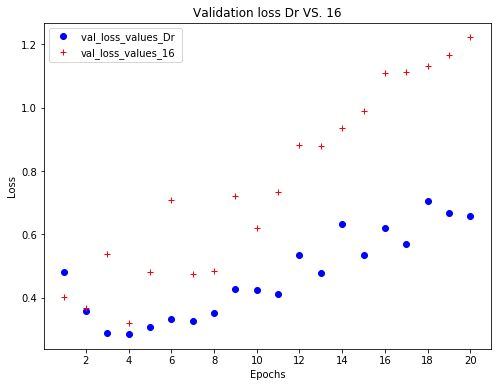

In [26]:
history_dict_Dr = history_Dr.history
val_loss_values_Dr = history_dict_Dr['val_loss']
val_loss_values_16 = history_dict_16['val_loss']
epochs = range(1, len(val_loss_values_16) + 1)

plt.figure(figsize=(8, 6))
plt.xticks(range(0, len(val_loss_values_16)+1, 2))
plt.plot(epochs, val_loss_values_Dr, 'bo', label="val_loss_values_Dr ")
plt.plot(epochs, val_loss_values_16, 'r+', label="val_loss_values_16")
plt.title("Validation loss Dr VS. 16")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()